In [1]:
# import packages

# standard imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
# modeling imports
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV

In [2]:
pd.set_option("display.max_rows", 101) # in order to display all rows 

In [3]:
# read in the filtered train data 
train= pd.read_csv('datasets/train_filtered.csv') 

In [4]:
# Create X and y.
X = train[['Overall Qual', 
           'Gr Liv Area', 
           'Garage Area', 
           'Garage Cars', 
           'Total Bsmt SF', 
           '1st Flr SF', 
           'Year Built', 
           'Year Remod/Add',
           'Full Bath', 
           'TotRms AbvGrd', 
           'Mas Vnr Area'
          ]]

y = train['SalePrice']

# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_overfit = poly.fit_transform(X)

In [5]:
poly.get_feature_names(X.columns)

['Overall Qual',
 'Gr Liv Area',
 'Garage Area',
 'Garage Cars',
 'Total Bsmt SF',
 '1st Flr SF',
 'Year Built',
 'Year Remod/Add',
 'Full Bath',
 'TotRms AbvGrd',
 'Mas Vnr Area',
 'Overall Qual^2',
 'Overall Qual Gr Liv Area',
 'Overall Qual Garage Area',
 'Overall Qual Garage Cars',
 'Overall Qual Total Bsmt SF',
 'Overall Qual 1st Flr SF',
 'Overall Qual Year Built',
 'Overall Qual Year Remod/Add',
 'Overall Qual Full Bath',
 'Overall Qual TotRms AbvGrd',
 'Overall Qual Mas Vnr Area',
 'Gr Liv Area^2',
 'Gr Liv Area Garage Area',
 'Gr Liv Area Garage Cars',
 'Gr Liv Area Total Bsmt SF',
 'Gr Liv Area 1st Flr SF',
 'Gr Liv Area Year Built',
 'Gr Liv Area Year Remod/Add',
 'Gr Liv Area Full Bath',
 'Gr Liv Area TotRms AbvGrd',
 'Gr Liv Area Mas Vnr Area',
 'Garage Area^2',
 'Garage Area Garage Cars',
 'Garage Area Total Bsmt SF',
 'Garage Area 1st Flr SF',
 'Garage Area Year Built',
 'Garage Area Year Remod/Add',
 'Garage Area Full Bath',
 'Garage Area TotRms AbvGrd',
 'Garage Area M

In [6]:
# Check out the dimensions of X_overfit.
X_overfit.shape

(2051, 77)

In [7]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X_overfit,
    y,
    test_size=0.428,
    random_state=42,
)

In [8]:
# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [9]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (1173, 77)
y_train shape is: (1173,)
Z_test shape is: (878, 77)
y_test shape is: (878,)


In [10]:
ols = LinearRegression()

In [11]:
ols.fit(Z_train, y_train)

LinearRegression()

In [12]:
print(f'Training R score: {ols.score(Z_train, y_train)}')

Training R score: 0.9015876855530252


In [13]:
print(f'Training R score: {ols.score(Z_test, y_test)}')

Training R score: 0.8615047741230862


In [14]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3,3,100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);

/Users/abhayaanabathula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 840684284.1489258, tolerance: 612019980.1041698
  model = cd_fast.enet_coordinate_descent_gram(
/Users/abhayaanabathula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 788102620.0759277, tolerance: 612019980.1041698
  model = cd_fast.enet_coordinate_descent_gram(
/Users/abhayaanabathula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1076128391.6738281, tolerance: 612019980.1041698
  model = cd_fast.enet_coordinate_descent_gram(
/Users/abhayaanabathula/

In [15]:
# Here is the optimal value of alpha
lasso_cv.alpha_

215.44346900318865

In [16]:
test = pd.read_csv('datasets/test.csv') 

In [17]:
test=test.fillna(0)

In [18]:
test.shape

(878, 80)

In [19]:
# Create X 
X_test = test[['Overall Qual', 
           'Gr Liv Area', 
           'Garage Area', 
           'Garage Cars', 
           'Total Bsmt SF', 
           '1st Flr SF', 
           'Year Built', 
           'Year Remod/Add',
           'Full Bath', 
           'TotRms AbvGrd', 
           'Mas Vnr Area'
          ]]

In [20]:
# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_test_overfit = poly.fit_transform(X_test)

In [21]:
# Scale our data.
# Relabeling scaled data as "Z" is common.
ssc = StandardScaler()
Z_test_data = ssc.fit_transform(X_test_overfit)

In [22]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3,3,100)

# Cross-validate over our list of Lasso alphas.
lasso_cross_val = LassoCV(alphas=l_alphas, cv=5)

# Fit model using best ridge alpha!
lasso_cross_val.fit(Z_test_data, y_test);

/Users/abhayaanabathula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1561438597.0175781, tolerance: 423372102.5348387
  model = cd_fast.enet_coordinate_descent_gram(
/Users/abhayaanabathula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6025362271.69873, tolerance: 423372102.5348387
  model = cd_fast.enet_coordinate_descent_gram(
/Users/abhayaanabathula/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8674316677.046875, tolerance: 423372102.5348387
  model = cd_fast.enet_coordinate_descent_gram(
/Users/abhayaanabathula/o

In [23]:
lasso_cross_val.coef_

array([    0.        ,    -0.        ,    -0.        ,    -0.        ,
           0.        ,     0.        ,  5807.68192761,     0.        ,
          -0.        , -5753.64391085,     0.        ,     0.        ,
           0.        ,    -0.        ,    -0.        ,     0.        ,
        5308.17884158,     0.        ,     0.        ,    -0.        ,
          -0.        ,     0.        ,     0.        ,    -0.        ,
          -0.        ,     0.        ,     0.        ,    -0.        ,
          -0.        ,    -0.        ,    -0.        ,     0.        ,
          -0.        ,  -679.45425094,    -0.        ,    -0.        ,
          -0.        ,    -0.        , -5478.84426869,    -0.        ,
           0.        ,    -0.        , -1766.01946345,    -0.        ,
          -0.        ,    -0.        ,    -0.        ,    -0.        ,
           0.        , -9499.66505861,     0.        ,     0.        ,
           0.        ,    -0.        ,    -0.        ,     0.        ,
      

In [24]:
pd.DataFrame(lasso_cross_val.coef_,index=poly.get_feature_names(X.columns), columns=['Coefficient'])

,Coefficient
Overall Qual,0.000000
Gr Liv Area,-0.000000
Garage Area,-0.000000
Garage Cars,-0.000000
Total Bsmt SF,0.000000
1st Flr SF,0.000000
Year Built,5807.681928
Year Remod/Add,0.000000
Full Bath,-0.000000
TotRms AbvGrd,-5753.643911


In [25]:
y_test_preds = lasso_cross_val.predict(Z_test_data)

In [26]:
predicted=pd.DataFrame({'Id':test['Id'], 'SalePrice':y_test_preds})

In [27]:
predicted.head()

,Id,SalePrice
0,2658,154398.068541
1,2718,163206.852020
2,2414,180812.975791
3,1989,175014.218935
4,625,182463.862104


In [28]:
predicted.to_csv('datasets/lasso_predictions.csv', index=False)

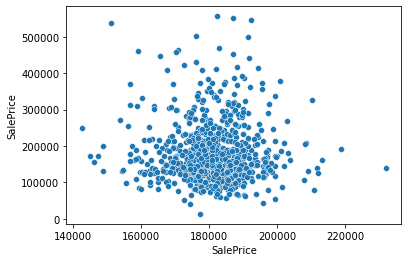

In [29]:
sns.scatterplot(x=predicted['SalePrice'], y=train['SalePrice'])
plt.savefig('data_visualization/predicted_vs_actual_lasso.jpeg')